In [94]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# sns.set_theme(style="whitegrid")


In [48]:
# presence=pd.read_excel('presence.csv')
booking=pd.read_json('data/roomBookings.json')
presence=pd.read_json('data/presences.json')
rooms=pd.read_json('data/rooms.json')
rooms_schedule=pd.read_json('data/roomSchedule.json')

In [29]:
rooms.scheduleType[10]

[]

In [36]:
# rooms[rooms['_id']=='5f5bd5fafc7a3450ea06e81c'].scheduleType
rooms.schedules

0      []
1      []
2      []
3      []
4      []
       ..
143    []
144    []
145    []
146    []
147    []
Name: schedules, Length: 148, dtype: object

In [6]:
booking.describe()

,id,aula,polo,sede,day,month,year,time.start,time.end
count,3298.000000,3298.000000,3298.000000,3298.000000,3298.000000,3298.000000,3298.0,3298.000000,3298.000000
mean,10114.562462,111.305640,24.267435,1000.025167,14.963614,11.395088,2020.0,13.674318,15.648848
std,90.067857,11.046541,6.050393,0.209648,8.005602,0.488944,0.0,3.251835,3.263433
min,10000.000000,30.000000,1.000000,1000.000000,1.000000,11.000000,2020.0,8.300000,10.000000
25%,10033.000000,113.000000,26.000000,1000.000000,10.000000,11.000000,2020.0,10.450000,12.450000
50%,10097.000000,113.000000,27.000000,1000.000000,15.000000,11.000000,2020.0,14.150000,16.150000
75%,10171.000000,113.000000,27.000000,1000.000000,20.000000,12.000000,2020.0,16.300000,18.300000
max,10345.000000,117.000000,27.000000,1003.000000,30.000000,12.000000,2020.0,18.300000,20.300000


In [7]:
pv_book=booking.pivot_table(values='aula',index='month',columns='year')

In [8]:
booking.corr()

,id,aula,polo,sede,day,month,year,time.start,time.end
id,1.000000,-0.027880,-0.091846,0.088639,-0.001660,0.261693,NaN,0.060600,0.058792
aula,-0.027880,1.000000,0.452938,-0.033969,-0.008013,0.030535,NaN,0.048458,0.095929
polo,-0.091846,0.452938,1.000000,-0.208077,0.021303,-0.027628,NaN,0.136218,0.160135
sede,0.088639,-0.033969,-0.208077,1.000000,0.001449,-0.005303,NaN,-0.040561,-0.043913
day,-0.001660,-0.008013,0.021303,0.001449,1.000000,-0.669067,NaN,-0.012409,-0.012365
month,0.261693,0.030535,-0.027628,-0.005303,-0.669067,1.000000,NaN,0.025250,0.026146
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
time.start,0.060600,0.048458,0.136218,-0.040561,-0.012409,0.025250,NaN,1.000000,0.998837
time.end,0.058792,0.095929,0.160135,-0.043913,-0.012365,0.026146,NaN,0.998837,1.000000


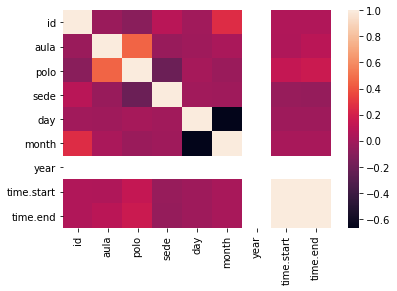

In [37]:
room

,_id,id,aula,polo,sede,day,month,year,time.start,time.end,bookingDate
0,5fa8267c1bd2a03f4641a0a1,10000,112,26,1000,12,11,2020,8.30,10.30,2020-11-08T17:10:20.337Z
1,5fa826f01bd2a03f4641a0a3,10000,112,26,1000,12,11,2020,10.45,12.45,2020-11-08T17:12:16.357Z
2,5fa8271f1bd2a03f4641a0a5,10001,113,27,1000,9,11,2020,8.30,10.30,2020-11-08T17:13:03.208Z
3,5fa827301bd2a03f4641a0a7,10001,113,27,1000,9,11,2020,10.45,12.45,2020-11-08T17:13:20.913Z
4,5fa8274c1bd2a03f4641a0a9,10001,113,27,1000,9,11,2020,14.15,16.15,2020-11-08T17:13:48.793Z
...,...,...,...,...,...,...,...,...,...,...,...
3293,5fd9de93ff3b76b96dd79893,10084,113,27,1000,16,12,2020,14.15,16.15,2020-12-16T10:16:51.017Z
3294,5fd9ded1ff3b76b96dd79895,10300,113,27,1000,16,12,2020,14.15,16.15,2020-12-16T10:17:53.122Z
3295,5fd9dedfff3b76b96dd79897,10300,113,27,1000,16,12,2020,16.30,18.30,2020-12-16T10:18:07.068Z
3296,5fd9e0f2ff3b76b96dd798a1,10044,113,27,1000,16,12,2020,14.15,16.15,2020-12-16T10:26:58.767Z


In [176]:
booking.corr()

,id,aula,polo,sede,day,month,year,time.start,time.end
id,1.000000,-0.027880,-0.091846,0.088639,-0.001660,0.261693,NaN,0.060600,0.058792
aula,-0.027880,1.000000,0.452938,-0.033969,-0.008013,0.030535,NaN,0.048458,0.095929
polo,-0.091846,0.452938,1.000000,-0.208077,0.021303,-0.027628,NaN,0.136218,0.160135
sede,0.088639,-0.033969,-0.208077,1.000000,0.001449,-0.005303,NaN,-0.040561,-0.043913
day,-0.001660,-0.008013,0.021303,0.001449,1.000000,-0.669067,NaN,-0.012409,-0.012365
month,0.261693,0.030535,-0.027628,-0.005303,-0.669067,1.000000,NaN,0.025250,0.026146
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
time.start,0.060600,0.048458,0.136218,-0.040561,-0.012409,0.025250,NaN,1.000000,0.998837
time.end,0.058792,0.095929,0.160135,-0.043913,-0.012365,0.026146,NaN,0.998837,1.000000


In [125]:
rooms.corr()

,Sede,aulaId,aulaDes,capienza,poloDes
Sede,1.000000,0.222294,0.185002,-0.133839,0.351597
aulaId,0.222294,1.000000,0.268115,-0.242003,-0.065268
aulaDes,0.185002,0.268115,1.000000,-0.326048,0.525050
capienza,-0.133839,-0.242003,-0.326048,1.000000,-0.112452
poloDes,0.351597,-0.065268,0.525050,-0.112452,1.000000


In [126]:
rooms.columns=[['_id', 'Seat', 'classId', 'classDes', 'capacity', 'buildingDes', 'date',
       'scheduleType', 'schedules']]

In [151]:
room_corr=rooms.corr()

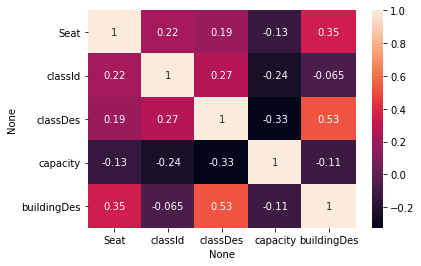

In [152]:
sns.heatmap(room_corr,annot=True)

In [132]:
presence

,_id,aula,sede,polo,inDate,date,posto,outDate
0,5fa8ef7d1bd2a03f4641a15e,1,1,1,2020-11-09T07:27:57.078Z,2020-11-09 07:27:57.078000+00:00,1,2020-11-09T12:05:00.362Z
1,5fa8efa51bd2a03f4641a15f,1,1,1,2020-11-09T07:28:37.074Z,2020-11-09 07:28:37.074000+00:00,2,2020-11-09T12:05:00.363Z
2,5fa8f0751bd2a03f4641a160,1,1,1,2020-11-09T07:32:05.878Z,2020-11-09 07:32:05.879000+00:00,3,2020-11-09T12:05:00.364Z
3,5fa8f0811bd2a03f4641a161,1,1,1,2020-11-09T07:32:17.390Z,2020-11-09 07:32:17.390000+00:00,4,2020-11-09T07:32:20.897Z
4,5fa8f0891bd2a03f4641a162,1,1,1,2020-11-09T07:32:25.980Z,2020-11-09 07:32:25.980000+00:00,5,2020-11-09T07:32:36.245Z
...,...,...,...,...,...,...,...,...
9836,5fd9dcb7ff3b76b96dd7987b,17,1,11,2020-12-16T10:08:55.168Z,2020-12-16 10:08:55.168000+00:00,13,NaN
9837,5fd9ddcfff3b76b96dd7988b,19,1,5,2020-12-16T10:13:35.299Z,2020-12-16 10:13:35.299000+00:00,12,NaN
9838,5fd9ddf1ff3b76b96dd7988e,1,1,1,2020-12-16T10:14:09.471Z,2020-12-16 10:14:09.471000+00:00,46,NaN
9839,5fd9de6cff3b76b96dd79891,13,4,9,2020-12-16T10:16:12.267Z,2020-12-16 10:16:12.267000+00:00,15,NaN


In [143]:
# presence.groupby('polo').max()['posto']
presence.columns=['_id', 'classroom', 'building', 'department', 'inDate', 'date', 'position', 'outDate']

In [121]:
presence['department'].nunique()
#number of unique departments

21

In [148]:
#correlation matrix for presences
p_corr=presence.corr()
p_corr

,classroom,building,department,position
classroom,1.000000,0.086330,0.549477,-0.271784
building,0.086330,1.000000,0.266890,-0.149027
department,0.549477,0.266890,1.000000,-0.249577
position,-0.271784,-0.149027,-0.249577,1.000000


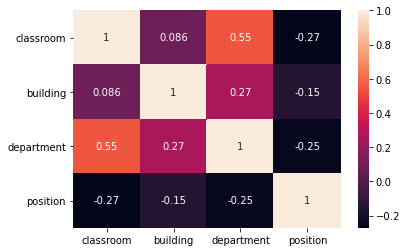

In [150]:
sns.heatmap(p_corr,annot=True)

In [91]:
x

,_id,aula,sede,polo,inDate,date,posto,outDate
11,5fa8f3d71bd2a03f4641a169,3,1,3,2020-11-09T07:46:31.376Z,2020-11-09 07:46:31.376000+00:00,1,2020-11-09T12:05:00.366Z
12,5fa8f3db1bd2a03f4641a16a,3,1,3,2020-11-09T07:46:35.032Z,2020-11-09 07:46:35.032000+00:00,2,2020-11-09T12:05:00.367Z
27,5fa8f5981bd2a03f4641a179,3,1,3,2020-11-09T07:54:00.156Z,2020-11-09 07:54:00.157000+00:00,3,2020-11-09T12:05:00.377Z
30,5fa8f5e81bd2a03f4641a17c,5,1,3,2020-11-09T07:55:20.011Z,2020-11-09 07:55:20.011000+00:00,1,2020-11-09T07:55:25.533Z
31,5fa8f5f21bd2a03f4641a17d,5,1,3,2020-11-09T07:55:30.118Z,2020-11-09 07:55:30.119000+00:00,2,2020-11-09T07:55:34.192Z
...,...,...,...,...,...,...,...,...
9232,5fd8701dff3b76b96dd79343,5,1,3,2020-12-15T08:13:17.803Z,2020-12-15 08:13:17.803000+00:00,1,2020-12-15T12:05:00.442Z
9254,5fd871f2ff3b76b96dd7935d,3,1,3,2020-12-15T08:21:06.785Z,2020-12-15 08:21:06.786000+00:00,7,2020-12-15T12:05:00.460Z
9494,5fd8c31cff3b76b96dd79586,6,1,3,2020-12-15T14:07:24.996Z,2020-12-15 14:07:24.996000+00:00,1,2020-12-15T18:05:00.449Z
9503,5fd8c38eff3b76b96dd7959b,6,1,3,2020-12-15T14:09:18.280Z,2020-12-15 14:09:18.281000+00:00,2,2020-12-15T18:05:00.455Z


In [57]:
presence[presence['building']==2 

SyntaxError: unexpected EOF while parsing (<ipython-input-57-1182b1f53962>, line 1)

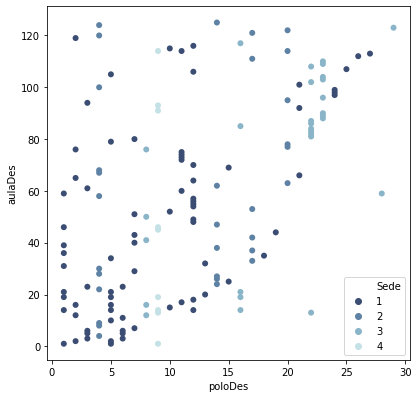

In [29]:
f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.scatterplot(x="poloDes", y="aulaDes",
                hue="Sede",
                palette="ch:r=-.2,d=.3_r",
               
                sizes=(1, 8), linewidth=0,
                data=rooms, ax=ax)


In [ ]:
rooms.columns=[['_id', 'seat', 'roomId', 'aulaDes', 'Capacity', 'poloDes', 'date',
       'scheduleType', 'schedules']]

In [20]:
rooms.corr()

,Sede,aulaId,aulaDes,capienza,poloDes
Sede,1.000000,0.222294,0.185002,-0.133839,0.351597
aulaId,0.222294,1.000000,0.268115,-0.242003,-0.065268
aulaDes,0.185002,0.268115,1.000000,-0.326048,0.525050
capienza,-0.133839,-0.242003,-0.326048,1.000000,-0.112452
poloDes,0.351597,-0.065268,0.525050,-0.112452,1.000000


In [9]:
rooms

,_id,Sede,aulaId,aulaDes,capienza,poloDes,date,scheduleType,schedules
0,5f5b4fdd400b9fbfbe0b8e94,1,1.0,69,10,15,2020-10-02 19:17:16.414000+00:00,[],[]
1,5f5b4fdd400b9fbfbe0b8e95,1,2.0,25,24,15,2020-12-15 15:38:27.918000+00:00,[],[]
2,5f5b4fdd400b9fbfbe0b8e96,1,3.0,12,12,2,2020-10-29 10:10:23.875000+00:00,[],[]
3,5f5b4fdd400b9fbfbe0b8e97,1,4.0,16,10,2,2020-12-15 10:17:12.238000+00:00,[],[]
4,5f5b4fdd400b9fbfbe0b8e98,1,7.0,35,76,18,2020-12-16 10:04:16.903000+00:00,[],[]
...,...,...,...,...,...,...,...,...,...
143,5f9ade072358534e7e6d469c,3,NaN,123,50,29,2020-10-29 15:21:43.206000+00:00,[],[]
144,5fa05a957916daa867a158ae,1,NaN,31,14,1,2020-12-16 08:04:17.292000+00:00,[],[]
145,5fa05aa77916daa867a158af,1,NaN,36,9,1,2020-12-16 09:46:29.789000+00:00,[],[]
146,5fc95263eb6dbced74b94f68,2,NaN,124,6,4,2020-12-03 21:02:27.777000+00:00,[],[]


In [10]:
r1= rooms.dropna()

In [11]:
r1

,_id,Sede,aulaId,aulaDes,capienza,poloDes,date,scheduleType,schedules
0,5f5b4fdd400b9fbfbe0b8e94,1,1.0,69,10,15,2020-10-02 19:17:16.414000+00:00,[],[]
1,5f5b4fdd400b9fbfbe0b8e95,1,2.0,25,24,15,2020-12-15 15:38:27.918000+00:00,[],[]
2,5f5b4fdd400b9fbfbe0b8e96,1,3.0,12,12,2,2020-10-29 10:10:23.875000+00:00,[],[]
3,5f5b4fdd400b9fbfbe0b8e97,1,4.0,16,10,2,2020-12-15 10:17:12.238000+00:00,[],[]
4,5f5b4fdd400b9fbfbe0b8e98,1,7.0,35,76,18,2020-12-16 10:04:16.903000+00:00,[],[]
...,...,...,...,...,...,...,...,...,...
114,5f5b4fdd400b9fbfbe0b8f07,1,5.0,106,12,12,2020-11-03 12:02:58.400000+00:00,[],[]
115,5f5b4fdd400b9fbfbe0b8f08,1,1.0,107,53,25,2020-10-22 10:58:19.138000+00:00,[],[]
116,5f5b4fdd400b9fbfbe0b8f09,3,8.0,108,10,22,2020-09-12 16:12:17.829000+00:00,[],[]
117,5f5b4fdd400b9fbfbe0b8f0a,3,2.0,109,8,23,2020-09-12 16:12:17.829000+00:00,[],[]


In [12]:
r1['capienza'].max()

247

In [23]:
rooms_schedule.dropna()

,_id,bookings,room,date
0,5fa8267c1bd2a03f4641a099,"[{'_id': '5fa8267c1bd2a03f4641a09a', 'start': ...",5f5bd5fafc7a3450ea06e81c,2020-11-08 17:10:20.328000+00:00
1,5fa859611bd2a03f4641a0e0,"[{'_id': '5fa859611bd2a03f4641a0e1', 'start': ...",5f5cc739fc7a3450ea06e838,2020-11-08 20:47:29.186000+00:00
2,5fa87aad1bd2a03f4641a130,"[{'_id': '5fa87aad1bd2a03f4641a131', 'start': ...",5f5b4fdd400b9fbfbe0b8ec3,2020-11-08 23:09:33.878000+00:00
3,5fa8fb591bd2a03f4641a1e9,"[{'_id': '5fa8fb591bd2a03f4641a1ea', 'start': ...",5f5bd5fafc7a3450ea06e81c,2020-11-09 08:18:33.344000+00:00
4,5fa8fc3d1bd2a03f4641a1f7,"[{'_id': '5fa8fc3d1bd2a03f4641a1f8', 'start': ...",5f5cc50bfc7a3450ea06e834,2020-11-09 08:22:21.433000+00:00
...,...,...,...,...
189,5fdc8542ff3b76b96dd79dab,"[{'_id': '5fdc8542ff3b76b96dd79dac', 'start': ...",5f5cc781fc7a3450ea06e839,2020-12-18 10:32:34.679000+00:00
190,5fde2cd81c7ca18763114afb,"[{'_id': '5fde2cd81c7ca18763114afc', 'start': ...",5f5cc50bfc7a3450ea06e834,2020-12-19 16:39:52.105000+00:00
191,5fdf86151c7ca18763114b2a,"[{'_id': '5fdf86151c7ca18763114b2b', 'start': ...",5f5cc50bfc7a3450ea06e834,2020-12-20 17:12:53.116000+00:00
192,5fdfabe51c7ca18763114b5e,"[{'_id': '5fdfabe51c7ca18763114b5f', 'start': ...",5f5cc50bfc7a3450ea06e834,2020-12-20 19:54:13.157000+00:00


In [93]:
booking

,_id,id,aula,polo,sede,day,month,year,time.start,time.end,bookingDate
0,5fa8267c1bd2a03f4641a0a1,10000,112,26,1000,12,11,2020,8.30,10.30,2020-11-08T17:10:20.337Z
1,5fa826f01bd2a03f4641a0a3,10000,112,26,1000,12,11,2020,10.45,12.45,2020-11-08T17:12:16.357Z
2,5fa8271f1bd2a03f4641a0a5,10001,113,27,1000,9,11,2020,8.30,10.30,2020-11-08T17:13:03.208Z
3,5fa827301bd2a03f4641a0a7,10001,113,27,1000,9,11,2020,10.45,12.45,2020-11-08T17:13:20.913Z
4,5fa8274c1bd2a03f4641a0a9,10001,113,27,1000,9,11,2020,14.15,16.15,2020-11-08T17:13:48.793Z
...,...,...,...,...,...,...,...,...,...,...,...
3293,5fd9de93ff3b76b96dd79893,10084,113,27,1000,16,12,2020,14.15,16.15,2020-12-16T10:16:51.017Z
3294,5fd9ded1ff3b76b96dd79895,10300,113,27,1000,16,12,2020,14.15,16.15,2020-12-16T10:17:53.122Z
3295,5fd9dedfff3b76b96dd79897,10300,113,27,1000,16,12,2020,16.30,18.30,2020-12-16T10:18:07.068Z
3296,5fd9e0f2ff3b76b96dd798a1,10044,113,27,1000,16,12,2020,14.15,16.15,2020-12-16T10:26:58.767Z


In [92]:
rooms_schedule.bookings

0      [{'_id': '5fa8267c1bd2a03f4641a09a', 'start': ...
1      [{'_id': '5fa859611bd2a03f4641a0e1', 'start': ...
2      [{'_id': '5fa87aad1bd2a03f4641a131', 'start': ...
3      [{'_id': '5fa8fb591bd2a03f4641a1ea', 'start': ...
4      [{'_id': '5fa8fc3d1bd2a03f4641a1f8', 'start': ...
                             ...                        
189    [{'_id': '5fdc8542ff3b76b96dd79dac', 'start': ...
190    [{'_id': '5fde2cd81c7ca18763114afc', 'start': ...
191    [{'_id': '5fdf86151c7ca18763114b2b', 'start': ...
192    [{'_id': '5fdfabe51c7ca18763114b5f', 'start': ...
193    [{'_id': '5fdfea6b1c7ca18763114ba0', 'start': ...
Name: bookings, Length: 194, dtype: object

In [87]:
rooms

,_id,Sede,aulaId,aulaDes,capienza,poloDes,date,scheduleType,schedules
0,5f5b4fdd400b9fbfbe0b8e94,1,1.0,69,10,15,2020-10-02 19:17:16.414000+00:00,[],[]
1,5f5b4fdd400b9fbfbe0b8e95,1,2.0,25,24,15,2020-12-15 15:38:27.918000+00:00,[],[]
2,5f5b4fdd400b9fbfbe0b8e96,1,3.0,12,12,2,2020-10-29 10:10:23.875000+00:00,[],[]
3,5f5b4fdd400b9fbfbe0b8e97,1,4.0,16,10,2,2020-12-15 10:17:12.238000+00:00,[],[]
4,5f5b4fdd400b9fbfbe0b8e98,1,7.0,35,76,18,2020-12-16 10:04:16.903000+00:00,[],[]
...,...,...,...,...,...,...,...,...,...
143,5f9ade072358534e7e6d469c,3,NaN,123,50,29,2020-10-29 15:21:43.206000+00:00,[],[]
144,5fa05a957916daa867a158ae,1,NaN,31,14,1,2020-12-16 08:04:17.292000+00:00,[],[]
145,5fa05aa77916daa867a158af,1,NaN,36,9,1,2020-12-16 09:46:29.789000+00:00,[],[]
146,5fc95263eb6dbced74b94f68,2,NaN,124,6,4,2020-12-03 21:02:27.777000+00:00,[],[]


In [73]:
p2=rooms._id.tolist()
p1=booking.id.tolist()
print(len(p1))
print(len(p2))

3298
148


In [72]:
newdf=pd.merge(booking,rooms,left_on=p1,right_on=p2)



ValueError: len(right_on) must equal len(left_on)

In [52]:
newdf

,_id,id,aula,polo,sede,day,month,year,time.start,time.end,bookingDate,Sede,aulaId,aulaDes,capienza,poloDes,date,scheduleType,schedules


In [54]:
type(rooms._id)

pandas.core.series.Series

In [56]:
type(booking.id)

pandas.core.series.Series

Student1    100
Student2     90
Student3     80
dtype: int64
[100, 90, 80]
<class 'list'>


In [62]:
series

Student1    100
Student2     90
Student3     80
Student4     90
Student5     85
dtype: int64

In [64]:
series.tolist()

[100, 90, 80, 90, 85]

['5f5b4fdd400b9fbfbe0b8e94',
 '5f5b4fdd400b9fbfbe0b8e95',
 '5f5b4fdd400b9fbfbe0b8e96',
 '5f5b4fdd400b9fbfbe0b8e97',
 '5f5b4fdd400b9fbfbe0b8e98',
 '5f5b4fdd400b9fbfbe0b8e99',
 '5f5b4fdd400b9fbfbe0b8e9a',
 '5f5b4fdd400b9fbfbe0b8e9b',
 '5f5b4fdd400b9fbfbe0b8e9c',
 '5f5b4fdd400b9fbfbe0b8e9d',
 '5f5b4fdd400b9fbfbe0b8e9e',
 '5f5b4fdd400b9fbfbe0b8e9f',
 '5f5b4fdd400b9fbfbe0b8ea0',
 '5f5b4fdd400b9fbfbe0b8ea1',
 '5f5b4fdd400b9fbfbe0b8ea2',
 '5f5b4fdd400b9fbfbe0b8ea3',
 '5f5b4fdd400b9fbfbe0b8ea4',
 '5f5b4fdd400b9fbfbe0b8ea5',
 '5f5b4fdd400b9fbfbe0b8ea6',
 '5f5b4fdd400b9fbfbe0b8ea7',
 '5f5b4fdd400b9fbfbe0b8ea8',
 '5f5b4fdd400b9fbfbe0b8ea9',
 '5f5b4fdd400b9fbfbe0b8eaa',
 '5f5b4fdd400b9fbfbe0b8eab',
 '5f5b4fdd400b9fbfbe0b8eac',
 '5f5b4fdd400b9fbfbe0b8ead',
 '5f5b4fdd400b9fbfbe0b8eae',
 '5f5b4fdd400b9fbfbe0b8eaf',
 '5f5b4fdd400b9fbfbe0b8eb0',
 '5f5b4fdd400b9fbfbe0b8eb1',
 '5f5b4fdd400b9fbfbe0b8eb2',
 '5f5b4fdd400b9fbfbe0b8eb3',
 '5f5b4fdd400b9fbfbe0b8eb4',
 '5f5b4fdd400b9fbfbe0b8eb5',
 '5f5b4fdd400b